In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

[0.38842275 0.31801365 0.2935636 ]


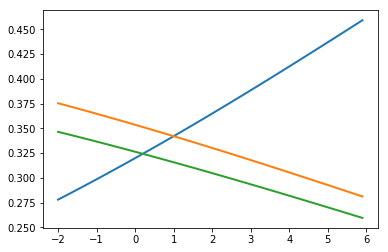

In [2]:
scores = [3.0, 1.0, 0.2]

def softmax(x):
    
    x = [ x/10 for x in scores]
    """Compute softmax values for each sets of scores in x."""
    return    np.exp(x)/np.sum(np.exp(x),axis=0)


print(softmax(scores))

# Plot softmax curves

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

In [3]:
scores = [3.0, 1.0, 0.2]
scores_10 = [ x/10 for x in scores]
print(scores)
print(scores_10)

[3.0, 1.0, 0.2]
[0.3, 0.1, 0.02]


In [4]:
'Assignmet 1 - NotMnist'

'Assignmet 1 - NotMnist'

In [5]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [6]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename


train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./notMNIST_large.tar.gz
Found and verified ./notMNIST_small.tar.gz


In [7]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [8]:
# Problem 1

# Need to display some samples. To do so lets define a function


def display_images(data_folder, amount):
    
    for folder in data_folder:
        print(folder)
        
        images_list = os.listdir(folder)
        images = random.sample(images_list,amount)
        
        for sample in images:
            
            image = os.path.join(folder,sample)
            display(Image(filename=image))

In [9]:
display_images(train_folders, 1)

./notMNIST_large/A


./notMNIST_large/B


./notMNIST_large/C


./notMNIST_large/D


./notMNIST_large/E


./notMNIST_large/F


./notMNIST_large/G


./notMNIST_large/H


./notMNIST_large/I


./notMNIST_large/J


In [10]:
# Problem 1

'Lets take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display'
    

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.


def load_letter(folder, min_num_images):
    
    image_files = os.listdir(folder)
    
    #create an emply 3-D array for images
    
    dataset = np.ndarray(shape = (len(image_files),image_size,image_size), dtype = np.float32)
    
    print(folder)
    
    num_images = 0
    
    for image in image_files:
        
        image_file = os.path.join(folder,image)
        try:
            image_data = (imageio.imread(image_file).astype(float)-pixel_depth/2)/pixel_depth
            
            if image_data.shape !=(image_size,image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
                
            dataset[num_images,:,:] = image_data
            
            num_images = num_images+1
            
        except (IOError, ValueError) as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
            
    dataset = dataset[0:num_images, :, :]
        
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
        
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset    
      

In [11]:
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    
    dataset_names = []
    
    for folder in data_folders:
        
        set_filename = folder + '.pickle'
        
        dataset_names.append(set_filename)
        
        if os.path.exists (set_filename) and not force:
            # Can be override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder,min_num_images_per_class)
            try:
                with open (set_filename,'wb') as f:
                    pickle.dump(dataset,f,pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)
                
    return dataset_names


                

In [12]:
train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

./notMNIST_large/A.pickle already present - Skipping pickling.
./notMNIST_large/B.pickle already present - Skipping pickling.
./notMNIST_large/C.pickle already present - Skipping pickling.
./notMNIST_large/D.pickle already present - Skipping pickling.
./notMNIST_large/E.pickle already present - Skipping pickling.
./notMNIST_large/F.pickle already present - Skipping pickling.
./notMNIST_large/G.pickle already present - Skipping pickling.
./notMNIST_large/H.pickle already present - Skipping pickling.
./notMNIST_large/I.pickle already present - Skipping pickling.
./notMNIST_large/J.pickle already present - Skipping pickling.
./notMNIST_small/A.pickle already present - Skipping pickling.
./notMNIST_small/B.pickle already present - Skipping pickling.
./notMNIST_small/C.pickle already present - Skipping pickling.
./notMNIST_small/D.pickle already present - Skipping pickling.
./notMNIST_small/E.pickle already present - Skipping pickling.
./notMNIST_small/F.pickle already present - Skipping pi

In [13]:
# Problem 2

# Next task is to open a pickle file and to display a few images
# The fucntion will randomly pick a folder and will display images

def load_images_from_pickle(folders):
    
    folder = random.sample(folders,1)
    pickle_file = ''.join(folder) + '.pickle'
    print(pickle_file)
    try:
        with open(pickle_file,'rb') as f:
            
            load_pickle = pickle.load(f)
    except Exception as e:
        print('Data is not readable', pickle_file,':',e)
        return
    
    plt.suptitle(''.join(folder)[-1])
    for i, img in enumerate(random.sample(list(load_pickle),8)):
        plt.subplot(2,4, i+1)
        plt.axis('off')
        plt.imshow(img)

./notMNIST_large/F.pickle


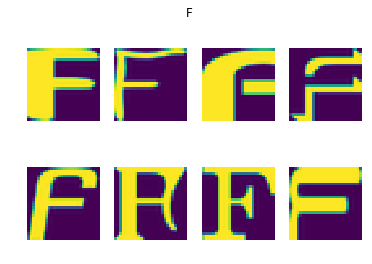

In [14]:
load_images_from_pickle(train_folders)

./notMNIST_small/F.pickle


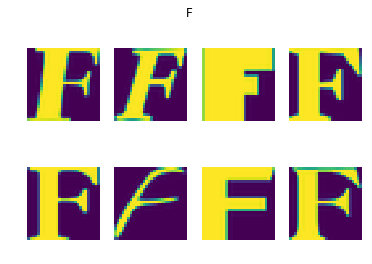

In [15]:
load_images_from_pickle(test_folders)

In [16]:
# Problem 3
# We need to check amount of samples in every folder (class)

def count_number_images(folder):
    
    for class_folder in folder:
        
        #print(class_folder)
        
        pickle_file = class_folder + '.pickle'
        
        with open(pickle_file,'rb') as f:
            load_pickle = pickle.load(f)
            print('Number of images in ', class_folder, ' : ', len(load_pickle))

In [17]:
count_number_images(train_folders)
count_number_images(test_folders)

Number of images in  ./notMNIST_large/A  :  52909
Number of images in  ./notMNIST_large/B  :  52911
Number of images in  ./notMNIST_large/C  :  52912
Number of images in  ./notMNIST_large/D  :  52911
Number of images in  ./notMNIST_large/E  :  52912
Number of images in  ./notMNIST_large/F  :  52912
Number of images in  ./notMNIST_large/G  :  52912
Number of images in  ./notMNIST_large/H  :  52912
Number of images in  ./notMNIST_large/I  :  52912
Number of images in  ./notMNIST_large/J  :  52911
Number of images in  ./notMNIST_small/A  :  1872
Number of images in  ./notMNIST_small/B  :  1873
Number of images in  ./notMNIST_small/C  :  1873
Number of images in  ./notMNIST_small/D  :  1873
Number of images in  ./notMNIST_small/E  :  1873
Number of images in  ./notMNIST_small/F  :  1872
Number of images in  ./notMNIST_small/G  :  1872
Number of images in  ./notMNIST_small/H  :  1872
Number of images in  ./notMNIST_small/I  :  1872
Number of images in  ./notMNIST_small/J  :  1872


In [18]:
# Merge and Prune the training set

def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [19]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels


In [20]:
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [21]:
# Problem 4
# We only need to print digits again to be sure that the data is still good after shuffling
# Create dictionary with all digits classes

class_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}

def display_shuffled_images(dataset,labels):
  items = random.sample(range(len(labels)), 8)
  for i, item in enumerate(items):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.title(class_labels[labels[item]])
    plt.imshow(dataset[item])
    
    
    

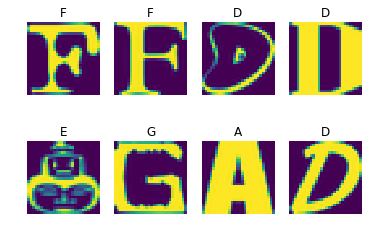

In [22]:
display_shuffled_images(train_dataset, train_labels)

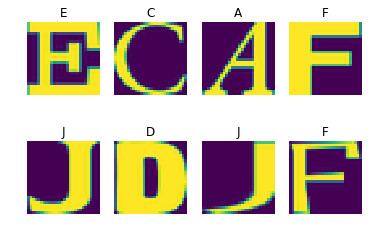

In [23]:
display_shuffled_images(test_dataset, test_labels)

In [24]:
#Finally, let's save the data for later reuse

pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [25]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800441


In [26]:
# Problem 5

#First, we need to detect similarities between datasets. We can do that by transforming matrix into a vector and look for cosine similarity

"compute cosine similarity of A to B: (A dot B)/{||A||*||B||)"

def get_similarities(dataset_A,dataset_B):
    
    length_A = len(dataset_A)
    length_B = len(dataset_B)
    
    # To flat a matrix
    
    vector_A = dataset_A.reshape(length_A, -1)
    vector_B = dataset_B.reshape(length_B, -1)
    
    #Compute numerator as a dot product of two vectors
    
    numerator = vector_A.dot(vector_B.T)
    
    #Compute denominator as an outerproduct of two norms A and B
    norm_A = np.sqrt((vector_A * vector_A).sum(axis=1))
    norm_B = np.sqrt((vector_B * vector_B).sum(axis=1))
    
    denominator = np.outer(norm_A,norm_B)
    
    cosine_simil = numerator/denominator
    
    assert cosine_simil.shape[0] == length_A
    assert cosine_simil.shape[1] == length_B
    
    return cosine_simil

In [27]:
# Since every matrix is pretty big, whay can be done is to expoit a fact that the same images
# in sets have same labels. Therefore we can detect similarities only between same labeled iamges to reduce the size 
# of intermediate matrices.

def sanitized_dataset(dataset_A, labels_A, dataset_B, labels_B, threshold = 1e-4):
    
    A_unique = np.ones_like(labels_A)
    
    for l in np.unique(labels_A):
        
        index_A = labels_A == l
        index_B = labels_B == l
        
        # To sort dataset according to a label
        
        sorted_A = dataset_A[index_A]
        sorted_B = dataset_B[index_B]
        
        # Compute distance between two sorted sets of labels
        
        distance = 1. - get_similarities(sorted_A,sorted_B)
        
        # Return the minimum values
        
        min_distances = distance.min(axis=1)
        
        #Find elements of the matrix whose distnace is bigger than threshold
        A_unique[index_A] = min_distances > threshold
        
    return dataset_A[A_unique == 1], labels_A[A_unique == 1]
        

In [28]:
a,b = sanitized_dataset (valid_dataset,valid_labels,valid_dataset,valid_labels)
print(a.shape, b.shape)
'Comparison of the set with itselt give 0 result, what was expected'

(0, 28, 28) (0,)


'Comparison of the set with itselt give 0 result, what was expected'

In [29]:
# Now let cleat the test set. It is crucial to have the data there that has not been seen during training procedure.
# Therefore remove duplications with validation and training set


X_test_clear, Y_test_clear = sanitized_dataset(test_dataset,test_labels,valid_dataset,valid_labels)
print(X_test_clear.shape,Y_test_clear.shape)

X_test_clear, Y_test_clear = sanitized_dataset(X_test_clear,Y_test_clear,train_dataset,train_labels)
print(X_test_clear.shape,Y_test_clear.shape)

'As a reminder, initially we had 10000 samples in valid and test sets. The one may see that 1500 samples of the test set are very similar or identical to the samples in the training set'

(9776, 28, 28) (9776,)
(8500, 28, 28) (8500,)


'As a reminder, initially we had 10000 samples in valid and test sets. The one may see that 1500 samples of the test set are very similar or identical to the samples in the training set'

In [30]:
# Now lets clear validation set in the same way

X_valid_clear, Y_valid_clear = sanitized_dataset(valid_dataset,valid_labels,test_dataset,test_labels)
print(X_valid_clear.shape,Y_valid_clear.shape)

X_valid_clear, Y_valid_clear = sanitized_dataset(valid_dataset,valid_labels,train_dataset,train_labels)
print(X_valid_clear.shape,Y_valid_clear.shape)

(9821, 28, 28) (9821,)
(8809, 28, 28) (8809,)


In [31]:
X_train, Y_train = train_dataset, train_labels

In [32]:
print('Train', X_train.shape, Y_train.shape)
print('Valid', X_valid_clear.shape, Y_valid_clear.shape)
print('Train', X_test_clear.shape, Y_test_clear.shape)

Train (200000, 28, 28) (200000,)
Valid (8809, 28, 28) (8809,)
Train (8500, 28, 28) (8500,)


In [35]:
# Problem 6
# We need to train a simple LogisticRegression for different amounts of samples
'Train a simple model on this data using 50, 100, 1000 and 5000 training samples'

from sklearn.linear_model import LogisticRegression

#create dictionary to store results which we will plot after

result = {}

for n in [50, 100, 1000, 5000]:
    
    clf = LogisticRegression(n_jobs=-1)
    clf.fit(X_train[:n].reshape(n, -1), Y_train[:n])
    score = clf.score(X_test_clear.reshape(len(X_test_clear), -1), Y_test_clear)

    result[n] = {'clf': clf, 'score': score}
    print(n, score)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


50 0.5936470588235294
100 0.7291764705882353
1000 0.8228235294117647
5000 0.8367058823529412


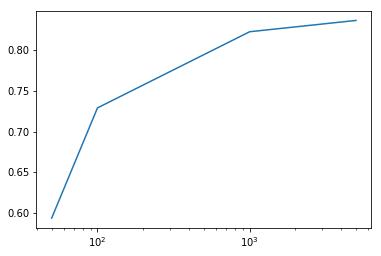

In [37]:
keys = result.keys()
keys.sort()
plt.xscale('log')
plt.plot(keys, [result[k]['score'] for k in keys])